<br>

### Exercício: Regressão Linear:
__Parte 1:__

1- Usando a função getData(), carregue os dados disponibilizados.

2- Separe parte dos dados para o dataset de teste.

3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

4- Implemente a regressão linear do scikit-learn e compare os resultados obtidos.

__Parte 2 (Introdução):__
}, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

__Parte 2 (Exercício):__

1- Estude o link:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

em que é discutido como criar modelos polinomiais com o scikit-learn de forma detalhada.

2- Repita os passos da primeira parte, mas agora considerando polinômios de graus 2 ou mais.

3- Inclua regularização Ridge e Lasso nas análises e teste os resultados para diferentes parâmetros $\alpha$.

<br>

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar
    
__Parte 2:__

Usando a função getData2(), carregue o dataset disponibilizado.

Use a regLogistica, classe criada na parte 1 do exercício, para treinar modelos nestes dados. Use validação cruzada para seleção dos parâmetros. Considere diferentes métricas de classificação e justifique as escolhas.

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_friedman1, make_classification

import warnings
warnings.filterwarnings("ignore")

#### 1- Usando a função getData(), carregue os dados disponibilizados.

In [299]:
#função para acessar os dados do exercício 1

def getData():
    X, y = make_friedman1(n_samples = 10000, n_features = 5, noise = 5.0, random_state = 0)
    return X, y

In [300]:
dados = getData()
X = dados[0]
y = dados[1]

In [301]:
X.shape, y.shape

((10000, 5), (10000,))

#### 2- Separe parte dos dados para o dataset de teste.

In [2]:
from sklearn.model_selection import train_test_split

In [303]:
print(X.shape)
print(y.shape)

(10000, 5)
(10000,)


In [304]:
print(X[:5])
print('*'*30)
print(y[:5])

[[0.5488135  0.71518937 0.60276338 0.54488318 0.4236548 ]
 [0.64589411 0.43758721 0.891773   0.96366276 0.38344152]
 [0.79172504 0.52889492 0.56804456 0.92559664 0.07103606]
 [0.0871293  0.0202184  0.83261985 0.77815675 0.87001215]
 [0.97861834 0.79915856 0.46147936 0.78052918 0.11827443]]
******************************
[15.28814034 21.53563265 15.33477388 18.80973929 16.17485067]


In [305]:
df = DataFrame(X,y, columns = ['a','b','c','d','e'])
df = df.reset_index()
df.rename({'index' : 'Value_y'}, inplace = True)
df_x = df[['a','b','c','d','e']].describe()
df_x

,a,b,c,d,e
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498909,0.495722,0.499773,0.498372,0.497706
std,0.289209,0.288137,0.287554,0.290480,0.290652
min,0.000074,0.000072,0.000207,0.000150,0.000264
25%,0.247350,0.243729,0.252368,0.245390,0.246145
50%,0.501612,0.494253,0.496004,0.498781,0.500112
75%,0.751399,0.744480,0.749774,0.748656,0.751494
max,0.999968,0.999957,0.999951,0.999978,0.999964


In [306]:
df.shape

(10000, 6)

#### Dados de X estão normalizados

In [307]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((7000, 5), (3000, 5), (7000,), (3000,))

##### 3- Usando a metodologia de validação cruzada, teste diferentes parâmetros da regLinear - diferentes learning_rates e num_steps - para escolher a melhor combinação de parâmetros.

- Valores Sklearn

In [308]:
#classe regLinear para exercício

class regLinear():
    
    def __init__(self, learning_rate, num_steps):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
            gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
            theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        return("modelo treinado.")
        
    def predict(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        preds = X_b.dot(self.theta_final)
        return preds.reshape(-1,)

In [197]:
from sklearn.metrics import mean_squared_error

def MSE(ytrue, ypred):
    return mean_squared_error(y_true = ytrue, y_pred = ypred)

def RMSE(ytrue, ypred):
    return np.sqrt(mean_squared_error(y_true = ytrue, y_pred = ypred))

In [310]:
learning_rate = [0.075, 0.01, 0.5, 1, 2]
num_steps = [10, 50, 100, 200]

In [311]:
for x in learning_rate:
    for i in num_steps:
        rg = regLinear(learning_rate = x, num_steps = i)
        rg.fit(Xtrain, ytrain)
        rg.theta_final
        rg.predict(Xtrain)
        print("learning_rate: ", x, "num_steps: ", i)
        print('-----------------------------------------------------------')
        print("Predições: ", rg.predict(Xtrain))
        
        #MSE
        MSE_step = RMSE(ytrue = ytrain, ypred = rg.predict(Xtrain))
        print("RMSE:", MSE_step)
        print('\n-----------------------------------------------------------\n')

learning_rate:  0.075 num_steps:  10
-----------------------------------------------------------
Predições:  [14.46517684 10.21244479 14.19943569 ... 16.4481015  13.00000302
 10.26051636]
RMSE: 6.146651336877984

-----------------------------------------------------------

learning_rate:  0.075 num_steps:  50
-----------------------------------------------------------
Predições:  [13.19107105  9.95496437 15.2874624  ... 14.88373007 14.85709193
 10.78888214]
RMSE: 5.797825540053322

-----------------------------------------------------------

learning_rate:  0.075 num_steps:  100
-----------------------------------------------------------
Predições:  [12.50939467  8.80274045 15.68815705 ... 14.42495681 14.87859755
  9.9175921 ]
RMSE: 5.62716446629216

-----------------------------------------------------------

learning_rate:  0.075 num_steps:  200
-----------------------------------------------------------
Predições:  [11.76281325  8.22950459 15.74096271 ... 13.77447528 15.19604281
  9

In [312]:
from sklearn.linear_model import LinearRegression

In [313]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)

LinearRegression()

In [314]:
lm = LinearRegression()
lm.fit(Xtrain, ytrain)
# prediçoes skit-learn
lm.predict(Xtrain)

array([11.43372619,  7.11587295, 15.71148128, ..., 13.89340994,
       15.12201638,  9.07224623])

In [315]:
# Modelo que obteve uma boa apresentação com os dados de treino
rg = regLinear(learning_rate = 0.075, num_steps = 200)
rg.fit(Xtrain, ytrain)
rg.theta_final
rg.predict(Xtrain)

array([11.69693666,  8.18683741, 15.71734102, ..., 13.66314186,
       15.2826074 , 10.05557358])

## Modelo performou bem e os valores das predições estão próximos

_Parte 2 (Introdução):__

Para cada variável explicativa $X_1, .., X_5$, crie outras variáveis usando o __quadrado__ de cada um delas. Desta forma, o conjunto final será de 10 variáveis, em que:

$X_6 = (X_1)^{2}$, $X_7 = (X_2)^{2}$, $X_8 = (X_3)^{2}$, $X_9 = (X_4)^{2}$, $X_{10} = (X_5)^{2}$.

Ao treinarmos uma regressão linear com essas 10 variáveis, a predição é da forma:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2}$

Como estamos usando o quadrado das variáveis explicativas, dizemos que temos um __modelo de regressão polinomial de grau 2__. Podemos ter variações deste modelo:

-Podemos aumentar o grau: basta mudar a potência que elevamos as variáveis. Por exemplo, podemos incluir o __cubo__ das variáveis e termos um modelo polinomial de ordem 3.

-Podemos ter __interações__ entre as variáveis: multiplicações entre as variáveis.

Exemplo:

$y_{pred} = \theta_0 + \theta_1 \cdot X_1 + .. + \theta_5 \cdot X_5 + \theta_6 \cdot (X_1)^{2} + .. + \theta_{10} \cdot (X_5)^{2} + \theta_{11} \cdot (X_1)^{3} + \theta_{12} \cdot V1 + \theta_{13} \cdot V2$,

onde

$V_1 = X_1 \cdot X_2$ e $V_2 = (X_2)^{2} \cdot X_4$

In [316]:
dff = df
df.drop(['index'], axis = 1,inplace = True)
df.head()

,a,b,c,d,e
0,0.548814,0.715189,0.602763,0.544883,0.423655
1,0.645894,0.437587,0.891773,0.963663,0.383442
2,0.791725,0.528895,0.568045,0.925597,0.071036
3,0.087129,0.020218,0.832620,0.778157,0.870012
4,0.978618,0.799159,0.461479,0.780529,0.118274


In [317]:
dfs = df**2
dfs.head()

,a,b,c,d,e
0,0.301196,0.511496,0.363324,0.296898,0.179483
1,0.417179,0.191483,0.795259,0.928646,0.147027
2,0.626829,0.279730,0.322675,0.856729,0.005046
3,0.007592,0.000409,0.693256,0.605528,0.756921
4,0.957694,0.638654,0.212963,0.609226,0.013989


In [318]:
dfs.rename(columns = {'a':'aa', 'b':'bb', 'c':'cc', 'd':'dd', 'e':'ee'}, inplace = True)
dfs.head()

,aa,bb,cc,dd,ee
0,0.301196,0.511496,0.363324,0.296898,0.179483
1,0.417179,0.191483,0.795259,0.928646,0.147027
2,0.626829,0.279730,0.322675,0.856729,0.005046
3,0.007592,0.000409,0.693256,0.605528,0.756921
4,0.957694,0.638654,0.212963,0.609226,0.013989


In [319]:
df_nv = pd.concat([df, dfs], axis = 1)
df_nv.head()

,a,b,c,d,e,aa,bb,cc,dd,ee
0,0.548814,0.715189,0.602763,0.544883,0.423655,0.301196,0.511496,0.363324,0.296898,0.179483
1,0.645894,0.437587,0.891773,0.963663,0.383442,0.417179,0.191483,0.795259,0.928646,0.147027
2,0.791725,0.528895,0.568045,0.925597,0.071036,0.626829,0.279730,0.322675,0.856729,0.005046
3,0.087129,0.020218,0.832620,0.778157,0.870012,0.007592,0.000409,0.693256,0.605528,0.756921
4,0.978618,0.799159,0.461479,0.780529,0.118274,0.957694,0.638654,0.212963,0.609226,0.013989


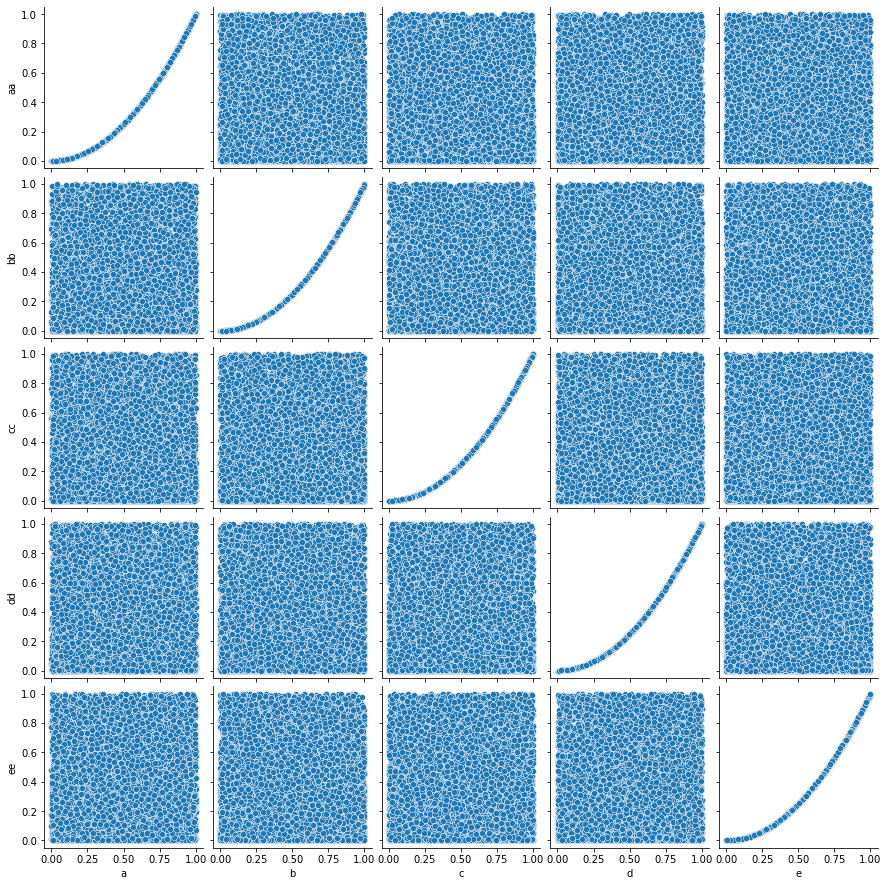

In [320]:
sns.pairplot(df_nv, x_vars=['a', 'b', 'c', 'd', 'e'], y_vars=['aa', 'bb', 'cc', 'dd', 'ee'])
# Conforme previsto valores de cada variavel elevado a 2, gera um polinomio de grau 2

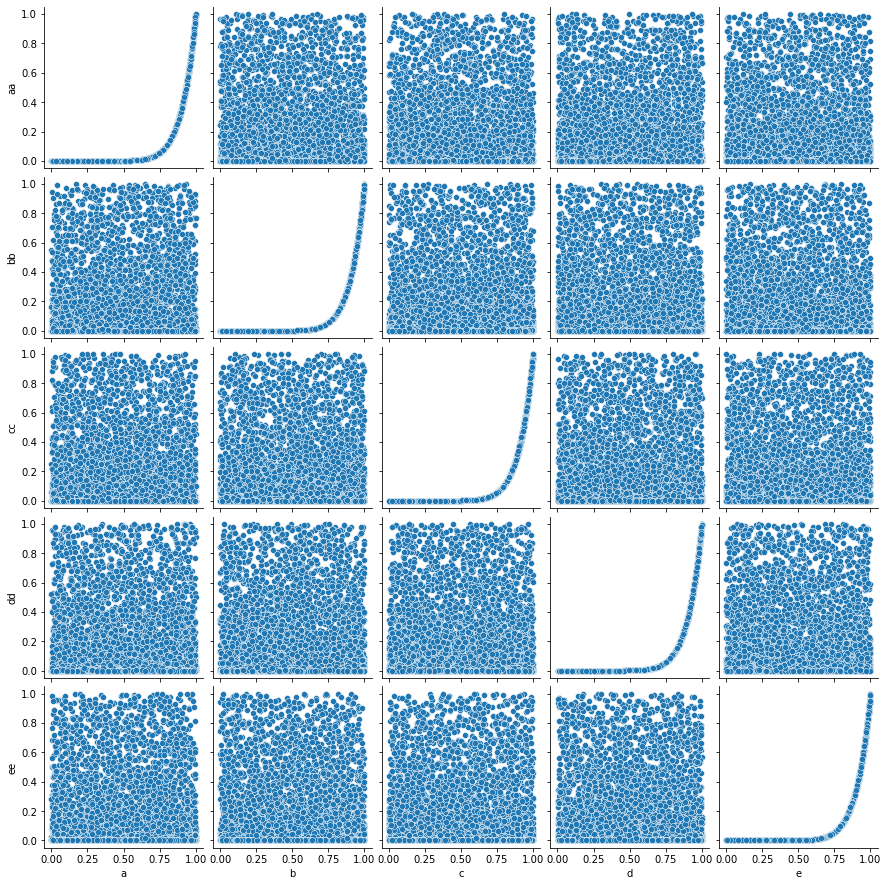

In [321]:
dfs = df**10 #elevado a 10
dfs.rename(columns = {'a':'aa', 'b':'bb', 'c':'cc', 'd':'dd', 'e':'ee'}, inplace = True)
df_nv = pd.concat([df, dfs], axis = 1)
sns.pairplot(df_nv, x_vars=['a', 'b', 'c', 'd', 'e'], y_vars=['aa', 'bb', 'cc', 'dd', 'ee'])

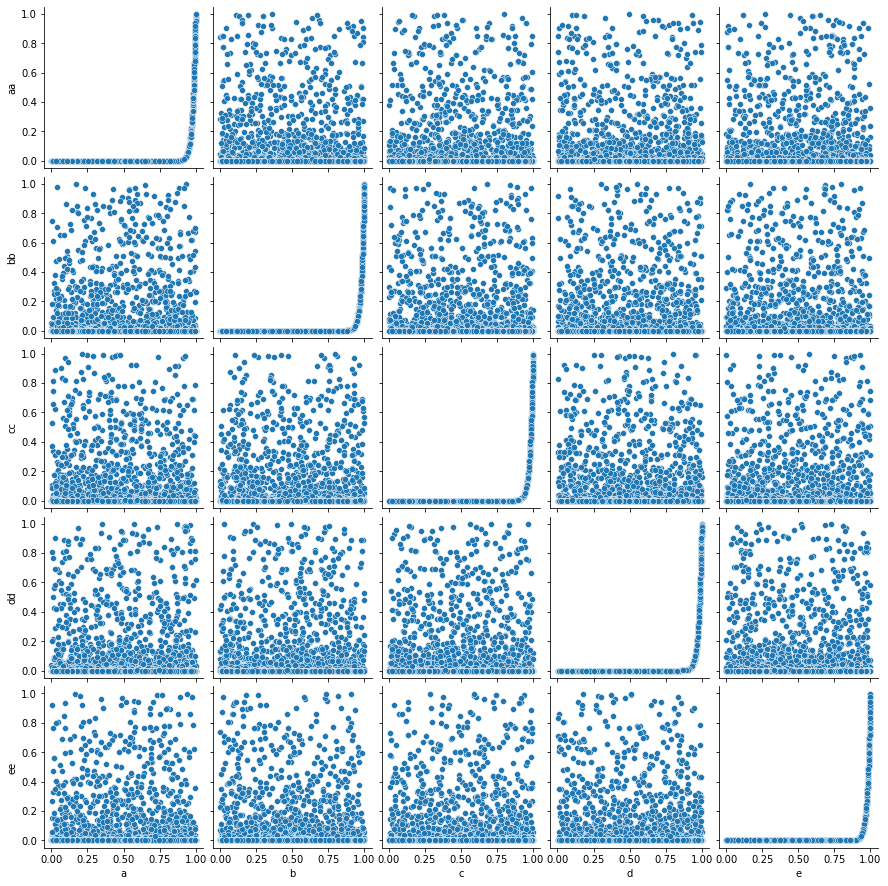

In [322]:
dfs = df**50
dfs.rename(columns = {'a':'aa', 'b':'bb', 'c':'cc', 'd':'dd', 'e':'ee'}, inplace = True)
df_nv = pd.concat([df, dfs], axis = 1)
sns.pairplot(df_nv, x_vars=['a', 'b', 'c', 'd', 'e'], y_vars=['aa', 'bb', 'cc', 'dd', 'ee'])
# elevado a 50

#### Demonstração do que acontece com os dados sendo inserido a variavel como X e sua exponenciação como y

In [356]:
X = df_nv['a'].values.reshape(-1,1)
y = y

In [357]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression()

In [358]:
from sklearn.preprocessing import PolynomialFeatures

In [359]:
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [367]:
X_poly = poly_features.fit_transform(X)
X_poly.shape

(10000, 2)

In [368]:
X_poly[:5]

array([[0.5488135 , 0.30119626],
       [0.64589411, 0.41717921],
       [0.79172504, 0.62682854],
       [0.0871293 , 0.00759151],
       [0.97861834, 0.95769386]])

In [369]:
poly_fit = LinearRegression() 
poly_fit.fit(X_poly, y)

poly_fit.intercept_, poly_fit.coef_

(9.181709819670955, array([ 18.23843652, -12.02071433]))

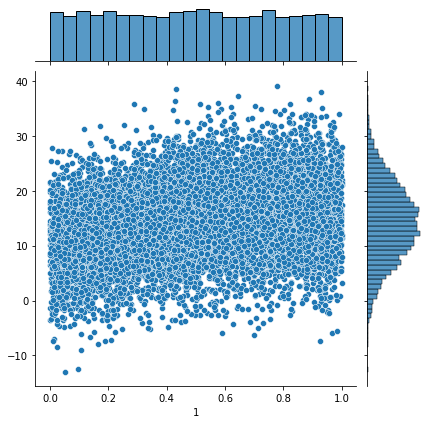

In [370]:
sns.jointplot(data = data, x = X0, y= y)

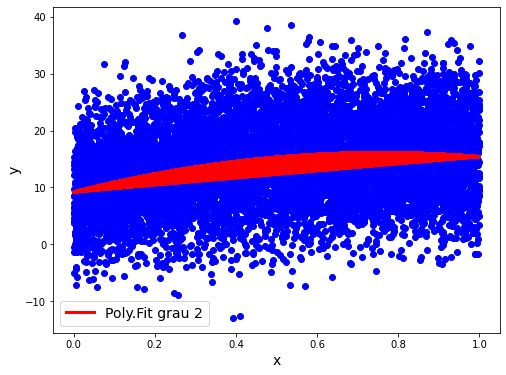

In [371]:
y_new = poly_fit.predict(X_poly)

plt.figure(figsize=[8,6])
plt.scatter(X, y, c = "blue")
plt.plot(X, y_new, "r-", linewidth=3, label="Poly.Fit grau 2")
plt.legend(fontsize = 14)
plt.xlabel("x", fontsize=14)
plt.ylabel("y", fontsize=14)
plt.show()

#### Dados bem concentrados quando comparamos uma variavel preditiva 'a', e a variavel y

### Exercício: Regressão Logística:

__Parte 1:__

Crie uma classe regLogistica para treinar o modelo de regressão logística. Essa classe deve ser usada para problemas de classificação binária, cuja variável target assume os valores: 0 (classe negativa) e 1 (classe positiva).

O método construtor dessa classe deve possuir 3 parâmetros: learning_rate, num_steps e limiar.

Os outros médotos devem ser:

    - médoto fit: para treinar o modelo - usando gradient descent
    
    - médoto predict_proba: para retornar a probabilidade da classe 1
    
    - médoto predict: retornar a classe predita: 0 ou 1 - dependente do limiar

In [122]:
#função para acessar os dados do exercício 2

def getData2():
    X, y = make_classification(n_classes=2, n_features=5, n_samples=10000, random_state = 0)
    return X, y

In [123]:
dados = getData2()
X = dados[0]
y = dados[1]

In [124]:
X.shape, y.shape

((10000, 5), (10000,))

In [125]:
# Conhecendo os dados

print(X[:5])
print('*'*30)
print(y[:5])

[[-0.82380715 -0.59163837  0.13041933 -0.40345475  1.16360785]
 [ 0.7091986   0.60606127 -0.37678226  0.39654936 -1.15961369]
 [ 1.61194498  0.36486859  1.91264129  0.38601731 -0.31972146]
 [-0.87521758  0.03070064 -1.66414467 -0.09315833  0.30731465]
 [-1.32532555  0.19953765 -2.9384829  -0.06318708 -0.96281507]]
******************************
[0 1 1 0 0]


In [126]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.30)
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((7000, 5), (3000, 5), (7000,), (3000,))

In [127]:
#implementando a função de perda logarítmica - Log Loss

def logLossCost(ytrue, ypred_probs):
    return (ytrue * np.log(ypred_probs) + (1 - ytrue) * np.log(1 - ypred_probs)).mean() * -1

In [128]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

In [129]:
class regLogistic():
    
    def __init__(self, learning_rate, num_steps, limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar = limiar
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
                yscores = sigmoid(X_b.dot(theta))
                gradients = X_b.T.dot(yscores - y)
                theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict_proba(self, X):
        m = X.shape[0] 
        k = X.shape[1]
        theta = np.random.randn(k+1,1)
        X_b = np.c_[np.ones((m, 1)), X] 
        yscores = sigmoid(X_b.dot(theta))
        return yscores
        
    def predict(self, X, limiar):
        m = X.shape[0] 
        k = X.shape[1]
        theta = np.random.randn(k+1,1)
        X_b = np.c_[np.ones((m, 1)), X] 
        yscores = sigmoid(X_b.dot(theta))
        gradient = X_b.T.dot(yscores - y)
        theta = theta - self.learning_rate * gradient
        logloss_step = logLossCost(ytrue = y, ypred_probs = yscores)
        logloss_step
        theta_final = theta
        probs = sigmoid(X_b.dot(theta_final))
        ypred = np.where(probs > limiar, 1, 0)
        return ypred

In [190]:
class regLogistic():
    
    def __init__(self, learning_rate, num_steps, limiar):
        self.learning_rate = learning_rate
        self.num_steps = num_steps
        self.limiar = limiar
        
    def fit(self, X, y):
        y = y.reshape(-1,1)
        m = X.shape[0] 
        k = X.shape[1] 
        theta = np.random.randn(k+1,1) 
        X_b = np.c_[np.ones((m, 1)), X] 
        for step in range(self.num_steps):
                yscores = sigmoid(X_b.dot(theta))
                gradients = X_b.T.dot(yscores - y)
                theta = theta - self.learning_rate * gradients
        self.theta_final = theta
        print("modelo treinado.")
        
    def predict_proba(self, X):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        yscores = sigmoid(X_b.dot(self.theta_final))
        return yscores
        
    def predict(self, X, limiar):
        m = X.shape[0]
        X_b = np.c_[np.ones((m, 1)), X]
        probs = sigmoid(X_b.dot(self.theta_final))
        logloss_step = logLossCost(ytrue = y, ypred_probs = probs)
        logloss_step
        ypred = np.where(probs > limiar, 1, 0)
        return ypred

In [191]:
rl = regLogistic(learning_rate = 0.01, num_steps = 100, limiar = 0.5)

In [192]:
rl.fit(X, y)

modelo treinado.


In [193]:
rl.predict_proba(X)

array([[8.19292815e-01],
       [2.01801620e-03],
       [9.99999826e-01],
       ...,
       [9.78273342e-09],
       [4.66870640e-10],
       [8.91809934e-08]])

In [194]:
rl.predict(X, 0.5)

array([[1],
       [0],
       [1],
       ...,
       [0],
       [0],
       [0]])

In [195]:
pred = rl.predict(X, 0.5)
pred.shape

(10000, 1)

In [199]:
print(pred[:10]), print(y[:10])

[[1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]]
[0 1 1 0 0 1 1 0 1 1]


(None, None)

In [200]:
MSE(ytrue = y, ypred = pred)

0.1735